<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Final_dynamic_worldmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#importing and installing libraries to work withimport pandas as pd
!pip install git+git://github.com/geopandas/geopandas.git
import geopandas as gpd
import pandas as pd
import PIL
import pylab
import numpy as math
import io
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
plt.style.use('ggplot')
!pip install mapclassify --quiet
import mapclassify.classifiers as classifiers
from mapclassify import __version__ as mc_version

In [116]:
#Selecting the required data from our main data set & a csv file of the names of all countries in the world:
cdf = pd.read_csv('/content/df_final_use.csv')
fa_df = cdf[['Country', 'Year', 'Food Availibility per capita (kg/cap/year)']]
data_path2 = '/content/countries_world.csv'
cdf = pd.read_csv(data_path2)

In [122]:
#Let's now merge the two data frames
data_frames = [fa_df, cdf]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='outer'), data_frames).fillna(pd.NaT)   
df_merged.reset_index(drop = True)
df_merged.sort_values(by=['Country', 'Year'], inplace = True)
unstacked_df = df_merged.unstack()
unstacked_df.sort_values(by = 'Country', inplace = True)

Country                                     0       Afghanistan
                                            1       Afghanistan
                                            2       Afghanistan
                                            3       Afghanistan
                                            4       Afghanistan
                                                       ...     
Food Availibility per capita (kg/cap/year)  2579        141.317
                                            2580        136.991
                                            2581        139.933
                                            2582        142.319
                                            2583        143.292
Length: 8133, dtype: object

In [88]:
df_merged.sort_values(by=['Country', 'Year'], inplace = True)
df_merged.reset_index(drop = True)
df_merged.set_index(['Country', 'Year'], inplace = True)
data = df_merged.unstack()
data.sort_values(by = 'Country', inplace = True)
data.drop(['Central African Republic', 'DRCongo','Congo',"Cote d'Ivoire",'Dominican Republic','Gambia','Korea, North','Kosovo','Sudan'], inplace = True)
data

Food Availibility per capita (kg/cap/year)  ...         
Year                                               NaN  ...   2013.0
Country                                                 ...         
Afghanistan                                        NaT  ...      NaT
Albania                                            NaT  ...      NaN
Algeria                                            NaT  ...  262.568
Andorra                                            NaT  ...      NaN
Angola                                             NaT  ...  109.588
...                                                ...  ...      ...
Venezuela                                          NaT  ...      NaN
Vietnam                                            NaT  ...  220.228
Yemen                                              NaT  ...  153.912
Zambia                                             NaT  ...  147.036
Zimbabwe                                           NaT  ...  143.292

[194 rows x 35 columns]

In [89]:
#uploading the world map.
world_map = gpd.read_file(r'/content/World_Map.shp')

In [ ]:
#Using a for loop, iterate through the names of the countries in our food availibility data set.
#See, using an if statement, which match with the World data set data and which don't. 
for index, row in data.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

In [91]:
#replace the names of the countries that don't match.
world_map.replace('Central African Republic', 'CAR', inplace = True)
world_map.replace('Dominican Republic', 'DomRep', inplace = True)
world_map.replace("Lao People's Democratic Republic", 'Laos', inplace = True)
world_map.replace('Republic of Moldova', 'Moldova', inplace = True)
world_map.replace("Korea, Democratic People's Republic of", 'North Korea', inplace = True)
world_map.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world_map.replace('Viet Nam', 'Vietnam', inplace = True)
world_map.replace("Cote d'Ivoire", "Céte d'Ivoire", inplace = True)
world_map.replace('Brunei Darussalam', 'Brunei', inplace = True)
world_map.replace('Democratic Republic of the Congo', 'Congo, Democratic Republic of the', inplace = True)
world_map.replace("Congo", 'Congo, Republic of the', inplace = True)
world_map.replace('Timor-Leste', 'East Timor (Timor-Leste)', inplace = True)
world_map.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world_map.replace("Korea, Democratic People's Republic of", 'Korea, North', inplace = True)
world_map.replace('Korea, Republic of', 'Korea, South', inplace = True)
world_map.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world_map.replace('The former Yugoslav Republic of Macedonia', 'Macedonia', inplace = True)
world_map.replace('Burma', 'Myanmar (Burma)', inplace = True)
world_map.replace('Sudan', 'South Sudan', inplace = True)
world_map.replace('Syrian Arab Republic', 'Syria', inplace = True)
world_map.replace('Bahamas', 'The Bahamas', inplace = True)
world_map.replace('Gambia', 'The Gambia', inplace = True)
world_map.replace('United States', 'United States of America', inplace = True)
world_map.replace('Holy See (Vatican City)', 'Vatican City (Holy See)', inplace = True)

In [92]:
#check again, if the outcome is void, then all the names correspond to each other.
for index, row in data.iterrows():
  if index not in world_map['NAME'].to_list():
    print(index)
  else:
    pass

In [ ]:
#Merge the world data with our food availibility data
merged = world_map.join(data, on = 'NAME', how = 'right')

ValueError: ignored

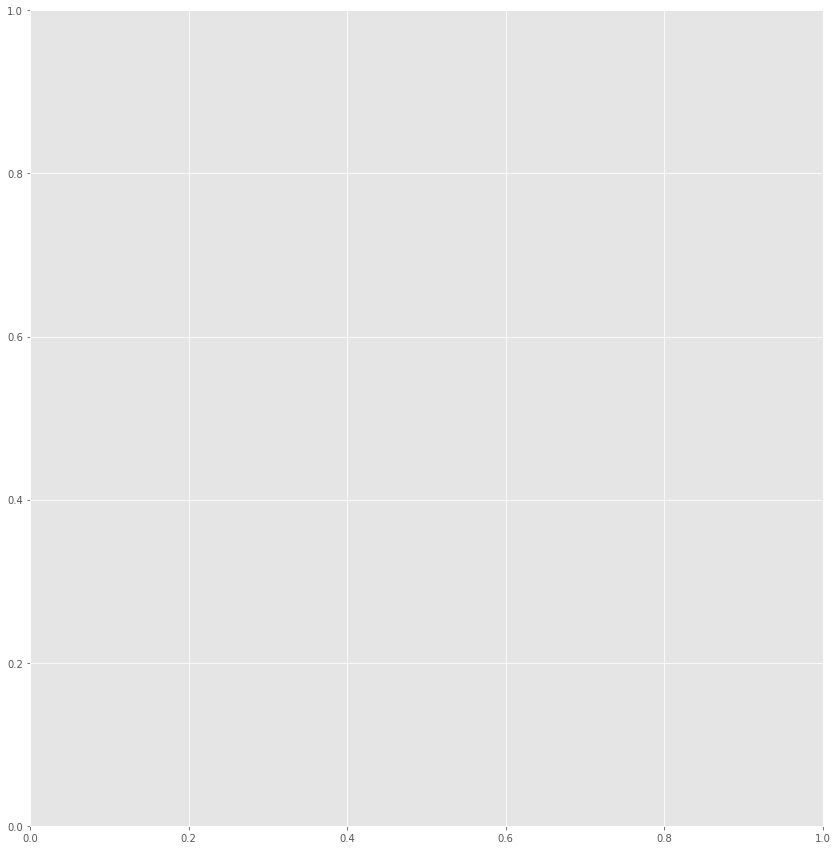

In [108]:
#Create an emply list that will be incremented with a .png file each loop:
image_list = []

#Create a for loop that:
for years in merged.columns.to_list()[2:36]:
    ax = merged.plot(column = years, cmap ='OrRd', figsize = (15,15), legend = True, scheme = 'user_defined', 
                     classification_kwds = {'bins':[-100,0,50,100,150,200,250,500,1000]}, edgecolor = 'black', linewidth = 0.5)

#Make a few changes to how the map looks:          
    ax.set_title(years, fontdict = {'fontsize':20}, pad = 12.5)
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((0.18, 1.05))
    img = ax.get_figure()

#Let us use a buffer and that we can close at a later stage:
    variable = io.BytesIO()
    img.savefig(variable, format = 'png', bbox_inches = 'tight')
    variable.seek(0)
    image_list.append(PIL.Image.open(variable))

#Save images to GIF file
image_list[0].save('Dynamic_map.gif', format = 'GIF',
               append_images = image_list[1:],
               save_all = True, duration = 300,
               loop = 0)
variable.close()